<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Spam SMS Classification

## Domain
SMS, Text Data

## Business Context
The SMS spam is a growing problem considering availability of cheap sms packages offered by various telecom service companies. SMS spam filtering is a relatively new task which inherits many issues and solutions from email spam filtering. The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according to ham (legitimate) or spam.
 
## Objective
Given a text message and label whether a sms is a spam message, can you train a classification model that allows you to correctly predict a new sms as spam or ham. 



### Package version
- tensorflow==2.3.0
- matplotlib==3.2.1
- h5py==2.10.0
- google==2.0.3

## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and Preparation

5. Text Preprocessing

6. Model Building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)


from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

2.8.0


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data
### 3.1 Read the data from the provided csv sms_spam_data.csv

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Statistical NLP/spam.csv' , encoding_errors = 'replace')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### 3.2 Check info and shape of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.shape

(5572, 5)

### 3.3 Drop irrelevant columns

In [8]:
df = df[['v1','v2']]

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 4. Data Analysis and Preparation

### 4.1 Check frequency distribution of target column. Report whether the class is balanced or not?

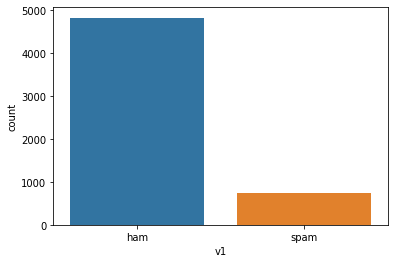

In [10]:
sns.countplot(df['v1'])

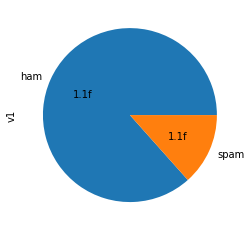

In [11]:
df['v1'].value_counts().plot(kind='pie',autopct = '1.1f')

###We can see clearly that frequency distribution is not balanced.






### 4.2 Encode the label column and make it numerical

In [12]:
df['v1'].replace ('ham',0,inplace = True)
df['v1'].replace ('spam',1,inplace = True)

In [13]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.rename(columns={'v1':'label1','v2':'Message'},inplace = True)

## 5. Text Preprocessing

### 5.1 Create a new column having length of the text message and see it’s distribution for the two classes ( ham and spam) and comment your findings

In [15]:
df['len'] = df['Message'].str.len() 
  

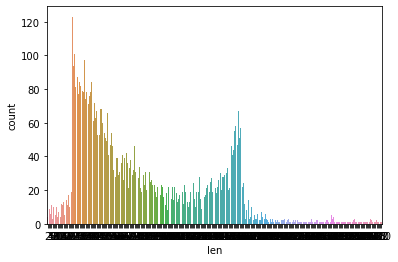

In [16]:
sns.countplot(df['len'])

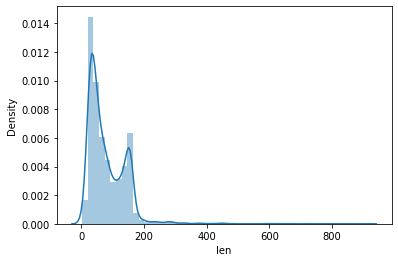

In [17]:
sns.distplot(df['len'])

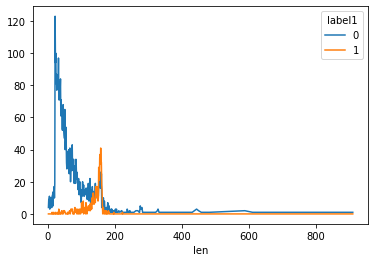

In [18]:
pd.crosstab(df['len'],df['label1']).plot()

In [19]:
df.head()

,label1,Message,len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### 5.2 Preprocess the text data to make it suitable for model building
- Convert the text message into lower case letters

In [20]:
import nltk # Import NLTK
from nltk.corpus import reuters

In [21]:
df['Message'] = df['Message'].str.lower()

In [22]:
df.head()

,label1,Message,len
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


- Remove stop words from the text message

In [23]:
from nltk.corpus import stopwords

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stop = set(stopwords.words('english'))

In [26]:
df['Message'] = df['Message'].apply(lambda words : ' '.join (word for word in  words.split()if word not in stop))

In [60]:
df.head(20)

,label1,Message,len,new_len,text
0,0,"go jurong point, crazy.. available bugis n gre...",111,91,go jurong point crazy available bugis n great ...
1,0,ok lar... joking wif u oni...,29,29,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...,155,141,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor... u c already say...,49,41,u dun say early hor u c already say
4,0,"nah think goes usf, lives around though",61,39,nah think goes usf lives around though
5,1,freemsg hey darling 3 week's word back! i'd li...,147,95,freemsg hey darling 3 weeks word back id like ...
6,0,even brother like speak me. treat like aids pa...,77,51,even brother like speak me treat like aids patent
7,0,per request 'melle melle (oru minnaminunginte ...,160,119,per request melle melle oru minnaminunginte nu...
8,1,winner!! valued network customer selected rece...,157,132,winner valued network customer selected receiv...
9,1,mobile 11 months more? u r entitled update lat...,154,116,mobile 11 months more u r entitled update late...


- Remove punctuations

In [30]:
df['new_len']= df['Message'].str.len()

In [31]:
df['text']= df['Message']

In [35]:
df['text']=df['text'].str.replace('[^\w\s]','') 

In [36]:
df.text

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
5       freemsg hey darling 3 weeks word back id like ...
6       even brother like speak me treat like aids patent
7       per request melle melle oru minnaminunginte nu...
8       winner valued network customer selected receiv...
9       mobile 11 months more u r entitled update late...
10      im gonna home soon want talk stuff anymore ton...
11      six chances win cash 100 20000 pounds txt csh1...
12      urgent 1 week free membership 100000 prize jac...
13      ive searching right words thank breather promi...
14                                       date sunday will
15      xxxmobilemovieclub use credit click wap link n...
16                                   oh kim watching here
17      eh u r

### 5.3 Segregate the data into X (independent feature - text message) and y (label) and split the data into train and test set ( take test size = 0.30)

In [41]:
X_train,X_test, Y_train, Y_test = train_test_split(df['text'],df['label1'],test_size=0.30)

In [43]:
X_train.shape

(3900,)

### 5.4 Create feature vectors of the text data

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
vectorizer= CountVectorizer()
vectorizer.fit(X_train)


CountVectorizer()

In [48]:
X_train_transformed = vectorizer.transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [49]:
X_train_transformed.shape

(3900, 7701)

## 6. Model building

### 6.1 Build and evaluate the Naive Bayes Model

In [50]:
from sklearn.naive_bayes import MultinomialNB


In [52]:
nb = MultinomialNB()

In [53]:
nb.fit(X_train_transformed,Y_train)

MultinomialNB()

### 6.2 Predict label for the test data and check confusion matrix

In [61]:
y_pred_class = nb.predict(X_test_transformed)

In [57]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, nb.predict(X_train_transformed))

0.9938461538461538

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


confusion_matrix(Y_test,y_pred_class)


array([[1451,    5],
       [  17,  199]])

In [66]:
print(classification_report(Y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1456
           1       0.98      0.92      0.95       216

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



# 7. Conclusion and Interpretation


We have got 99% for ham and we have got 95% for Spam

We can perform upsampling/downsampling on this model to increase the accuracy

The precision and recall for the 'Ham' class is high which makes the fi-score high

One of the reasons for this could be that there is a clear class imbalance




##. Further Explore

- Can you analyze the false positive and false negative messages individually and figure out why the model made a mistake and how it can be improved?